In [1]:
import random
from collections import defaultdict
import numpy as np
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def load_data(path):
    user_ratings = defaultdict(set)
    with open(path, 'r') as f:
        for line in f.readlines():
            u, i = line.split(" ")
            u = int(u)
            i = int(i)
            user_ratings[u].add(i)
    return user_ratings

In [3]:
# read file to variables
def load_test_data( path):
    file = open(path, 'r')
    for line in file:
        line = line.split(' ')
        user = int(line[0])
        item = int(line[1])
        test_data[user - 1][item - 1] = 1

def load_train_data( path):
    file = open(path, 'r')
    for line in file:
        line = line.split(' ')
        user = int(line[0])
        item = int(line[1])
        train_data[user - 1][item - 1] = 1

In [4]:
# BPR thoughts
def train(user_ratings_train):
    for user in range(user_count):  #一次training训练用户数目次
        # sample a user
        u = random.randint(1, user_count)
        if u not in user_ratings_train.keys():
            continue
        # Sample a positive item from the observed items
        i = random.choice(list(user_ratings_train[u]))
        # sample a negative item from the unobserved items
        j = random.randint(1, item_count)
        while j in user_ratings_train[u]:
            j = random.randint(1, item_count)
        u -= 1
        i -= 1
        j -= 1
        r_ui = np.dot(U[u], V[i].T) + biasV[i]
        r_uj = np.dot(U[u], V[j].T) + biasV[j]
        r_uij = r_ui - r_uj
        loss_func = -1.0 / (1 + np.exp(r_uij))
        # update U and V
        U[u] += -lr * (loss_func * (V[i] - V[j]) + reg * U[u])
        V[i] += -lr * (loss_func * U[u] + reg * V[i])
        V[j] += -lr * (loss_func * (-U[u]) + reg * V[j])
        # update biasV
        biasV[i] += -lr * (loss_func + reg * biasV[i])
        biasV[j] += -lr * (-loss_func + reg * biasV[j])

In [44]:
def yi(a,b):
    if a>b:
        return 1
    else:
        return 0
def paperauc(predict_matrix,train_data,test_data):
    jisuan=[]
    for u in range(user_count):
        #ji zhi ：compute the ave of E
        ji=0
        zhi=0
        for i in range(item_count):
            if test_data[u][i]==1:
                for j in range(item_count):
                    if test_data[u][j]==0 and train_data[u][j]==0:
                        ji=ji+1
                        zhi=zhi+yi(predict_matrix[u][i], predict_matrix[u][j])
        if ji!=0:
            jisuan.append(zhi/ji)             
    return  np.sum(jisuan)/len(jisuan)

In [47]:
user_count = 943
item_count = 1682
latent_factors = 10
lr = 0.01
reg = 0.01

# summarize two dataset
train_data_path = 'train.txt'
test_data_path = 'test.txt'
test_data = np.zeros((user_count, item_count))
train_data = np.zeros((user_count, item_count))
load_test_data(test_data_path)
load_train_data(train_data_path)

## Train 100 times use properauc 

In [48]:
liji=[5,10,15,20,25,30,35,40,45,50]
data=[]
#latent factors range__
for latent_factors in liji:
    train_count = 100
    U = np.random.rand(user_count, latent_factors) 
    V = np.random.rand(item_count, latent_factors)
    biasV = np.random.rand(item_count)
    user_ratings_train = load_data(train_data_path)
    # training
    for i in range(train_count):
        train(user_ratings_train)
    # prediction
    predict_matrix = U @ V.T
    auc= paperauc(predict_matrix,train_data,test_data)
    data.append(auc)

In [49]:
print('AUC:', data)

AUC: [0.8072380617064306, 0.8251058889374895, 0.8368240227410451, 0.8418532836830296, 0.8438759823973017, 0.8458135619976377, 0.845646247252259, 0.8471906682495913, 0.8484432957370104, 0.8462131151059384]


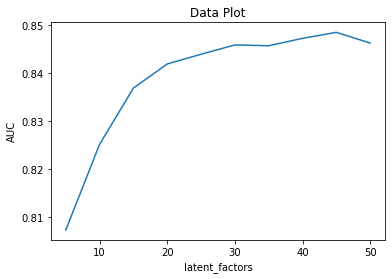

In [52]:
# 创建一个新的图形
plt.figure()

# 绘制折线图
plt.plot(liji, data)

# 添加标题和轴标签
plt.title("Data Plot")
plt.xlabel("latent_factors")
plt.ylabel("AUC")

# 显示图形
plt.show()

## Train 1000 times use properauc

AUC: [0.8671999920611241, 0.8674673087515196, 0.8686799582953969, 0.8658637398579571, 0.865853197773277, 0.866189612219103, 0.8632820419868782, 0.864220188618702, 0.8643271757137357, 0.8604926145998301]


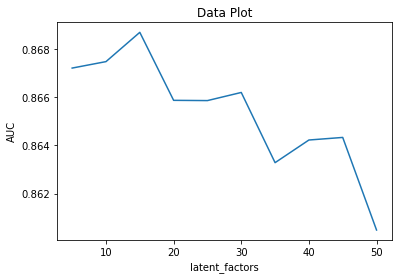

In [53]:
liji=[5,10,15,20,25,30,35,40,45,50]
data1=[]
#latent factors range__
for latent_factors in liji:
    train_count = 1000
    U = np.random.rand(user_count, latent_factors) 
    V = np.random.rand(item_count, latent_factors)
    biasV = np.random.rand(item_count)
    user_ratings_train = load_data(train_data_path)
    
    # training
    for i in range(train_count):
        train(user_ratings_train)
    # prediction
    predict_matrix = U @ V.T
    
    
    auc= paperauc(predict_matrix,train_data,test_data)
    data1.append(auc)
    
print('AUC:', data1)
# 创建一个新的图形
plt.figure()
# 绘制折线图
plt.plot(liji, data1)

# 添加标题和轴标签
plt.title("Data Plot")
plt.xlabel("latent_factors")
plt.ylabel("AUC")

# 显示图形
plt.show()

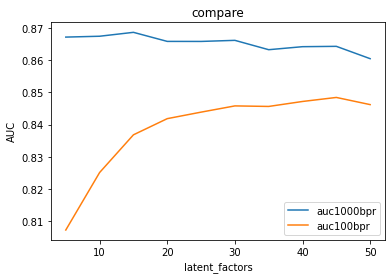

In [54]:
plt.plot(liji,data1,label='auc1000bpr')
plt.plot(liji,data,label='auc100bpr')
plt.title('compare')
plt.xlabel("latent_factors")
plt.ylabel("AUC")
plt.legend()

## Train svd-mf

In [60]:
def trainsvd(user_ratings_train):
    R = np.zeros((user_count, item_count))
    for user, items in user_ratings_train.items():
        for item in items:
            R[user - 1][item - 1] = 1

    U, sigma, Vt = np.linalg.svd(R, full_matrices=False)
    S = np.diag(sigma[:latent_factors])
    U = U[:, :latent_factors] @ np.sqrt(S)
    V = np.sqrt(S) @ Vt[:latent_factors, :]
    return U,V

In [66]:
liji=[5,10,15,20,25,30,35,40,45,50]
datasvd=[]
for latent_factors in liji:
    
    # training
    U,V = trainsvd(user_ratings_train)
    # prediction
    predict_matrix = U @ V
    
    auc= paperauc(predict_matrix,train_data,test_data)
    datasvd.append(auc)

## Compare 

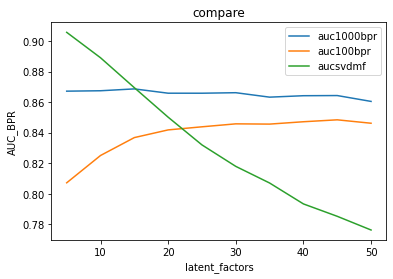

In [69]:
plt.plot(liji,data1,label='auc1000bpr')
plt.plot(liji,data,label='auc100bpr')
plt.plot(liji,datasvd,label='aucsvdmf')
plt.title('compare')
plt.xlabel("latent_factors")
plt.ylabel("AUC_BPR")
plt.legend()

## Wait , if you use "auc_score = roc_auc_score(self.test, self.predict_)" There is a big difference

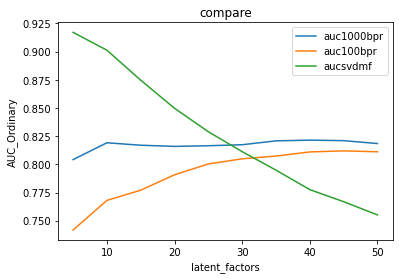

In [70]:
#this are calculated by auc_score = roc_auc_score(self.test, self.predict_) 
auc1000bpr= [0.8041882680537298, 0.8191213379899891, 0.81694507444179, 0.8159189112752492, 0.8165025369784349, 0.8173845603506716, 0.8208089276396702, 0.8214593408316537, 0.821006049993474, 0.8184273701675046]
auc100bpr=  [0.7417298284332993, 0.7679972472409847, 0.7770693554630607, 0.7907072914263665, 0.8003432999848529, 0.804893180242612, 0.8073263448846536, 0.8109862506016468, 0.8119354186940981, 0.811134304668699]
aucsvdmf= [0.9170916624718042, 0.9012438726273773, 0.8746447811820954, 0.8497221320929991, 0.8289091281378702, 0.811249554142763, 0.7948461788047375, 0.7775618204087245, 0.7668382469208646, 0.7551417540864905]
x=[5,10,15,20,25,30,35,40,45,50]
plt.plot(x,auc1000bpr,label='auc1000bpr')
plt.plot(x,auc100bpr,label='auc100bpr')
plt.plot(x,aucsvdmf,label='aucsvdmf')
plt.title('compare')
plt.xlabel("latent_factors")
plt.ylabel("AUC_Ordinary")
plt.legend()

## So how to evaluate can make a huge difference!